# Lending Club

 Lending Club is a marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return. 

**Problem Statement**

When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company




### Exploratory Data Analysis and Data Visualization

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
#read the dataset and check the relative columns
rg1 = pd.read_csv('D:\\Masters\\Python practice files\\Statistics Essential\\loan\\loan.csv')

rg = rg1[['loan_status','loan_amnt','term','int_rate','grade','sub_grade','annual_inc','purpose','dti','emp_length','last_pymnt_d','home_ownership','verification_status']]

print(rg.head())


   loan_status  loan_amnt        term int_rate grade sub_grade  annual_inc  \
0   Fully Paid       5000   36 months   10.65%     B        B2     24000.0   
1  Charged Off       2500   60 months   15.27%     C        C4     30000.0   
2   Fully Paid       2400   36 months   15.96%     C        C5     12252.0   
3   Fully Paid      10000   36 months   13.49%     C        C1     49200.0   
4      Current       3000   60 months   12.69%     B        B5     80000.0   

          purpose    dti emp_length last_pymnt_d home_ownership  \
0     credit_card  27.65  10+ years       Jan-15           RENT   
1             car   1.00   < 1 year       Apr-13           RENT   
2  small_business   8.72  10+ years       Jun-14           RENT   
3           other  20.00  10+ years       Jan-15           RENT   
4           other  17.94     1 year       May-16           RENT   

  verification_status  
0            Verified  
1     Source Verified  
2        Not Verified  
3     Source Verified  
4     So

In [3]:
#Check the shape of the dataframe and Data variables

print('Rows and Columns -',rg.shape)
print('\nDescription\n\n',rg.describe())


Rows and Columns - (39717, 13)

Description

           loan_amnt    annual_inc           dti
count  39717.000000  3.971700e+04  39717.000000
mean   11219.443815  6.896893e+04     13.315130
std     7456.670694  6.379377e+04      6.678594
min      500.000000  4.000000e+03      0.000000
25%     5500.000000  4.040400e+04      8.170000
50%    10000.000000  5.900000e+04     13.400000
75%    15000.000000  8.230000e+04     18.600000
max    35000.000000  6.000000e+06     29.990000


### Data Handling and Cleaning

In [4]:
#Check the datatypes of all the columns of the dataframe
for i  in rg.columns:
    print(i,'\t',': dtype ',rg[i].dtype)

loan_status 	 : dtype  object
loan_amnt 	 : dtype  int64
term 	 : dtype  object
int_rate 	 : dtype  object
grade 	 : dtype  object
sub_grade 	 : dtype  object
annual_inc 	 : dtype  float64
purpose 	 : dtype  object
dti 	 : dtype  float64
emp_length 	 : dtype  object
last_pymnt_d 	 : dtype  object
home_ownership 	 : dtype  object
verification_status 	 : dtype  object


#### Missing Value Treatment

In [5]:
#Check the number of null values in the columns
for i in rg.columns:
    print(i,rg[i].isnull().sum())

loan_status 0
loan_amnt 0
term 0
int_rate 0
grade 0
sub_grade 0
annual_inc 0
purpose 0
dti 0
emp_length 1075
last_pymnt_d 71
home_ownership 0
verification_status 0


### Handling Incorrect Data Types 

In [6]:
#Drop the rows having null values in the Rating field
rg = rg[(~rg.emp_length.isnull()) & (~rg.last_pymnt_d.isnull())]

#The ones marked 'current' are neither fully paid not defaulted, so get rid of the current loans. 
rg.drop(rg[rg.loan_status=='Current'].index, inplace=True)

#NONE is typically not used in 'fully paid' applications, so for comparison, remove 'NONE' type too
rg.drop(rg[rg.home_ownership=='NONE'].index, inplace=True)

#Lets take the number of months in integer format for data analysis
rg['term'] = rg['term'].str.slice(0, 3).astype(int)

#lets extract the month name
rg['last_pymnt_d'] = rg['last_pymnt_d'].str.slice(0, 3)

#Take in the float format, leaving the '%' from string format convert to float
rg['int_rate'] = rg['int_rate'].str.replace("%","").astype(float)

#Let calculate only values and eliminate the '<1' & '10+' to 0 and 11 for free flow of calculations and convert to integer format
rg['emp_length'] = rg['emp_length'].str.replace(" years","")
rg['emp_length'] = rg['emp_length'].str.replace(" year","")
rg['emp_length'] = rg['emp_length'].str.replace("< 1","0")
rg['emp_length'] = rg['emp_length'].str.replace("10\+","11")
rg['emp_length'] = rg['emp_length'].astype(int)

#Check the shape of the dataframe
rg.shape

(37475, 13)

In [7]:
# Check the number of nulls in the Rating field again to cross-verify
for i in rg.columns:
    print(i,rg[i].isnull().sum())


loan_status 0
loan_amnt 0
term 0
int_rate 0
grade 0
sub_grade 0
annual_inc 0
purpose 0
dti 0
emp_length 0
last_pymnt_d 0
home_ownership 0
verification_status 0


In [8]:
#Sample rows for verifying the values
print(rg.head(10))


    loan_status  loan_amnt  term  int_rate grade sub_grade  annual_inc  \
0    Fully Paid       5000    36     10.65     B        B2     24000.0   
1   Charged Off       2500    60     15.27     C        C4     30000.0   
2    Fully Paid       2400    36     15.96     C        C5     12252.0   
3    Fully Paid      10000    36     13.49     C        C1     49200.0   
5    Fully Paid       5000    36      7.90     A        A4     36000.0   
6    Fully Paid       7000    60     15.96     C        C5     47004.0   
7    Fully Paid       3000    36     18.64     E        E1     48000.0   
8   Charged Off       5600    60     21.28     F        F2     40000.0   
9   Charged Off       5375    60     12.69     B        B5     15000.0   
10   Fully Paid       6500    60     14.65     C        C3     72000.0   

               purpose    dti  emp_length last_pymnt_d home_ownership  \
0          credit_card  27.65          11          Jan           RENT   
1                  car   1.00          

In [9]:
#Inspect the columns and data type
for i in rg.columns:
    print(i,'\t',rg[i].dtype)

loan_status 	 object
loan_amnt 	 int64
term 	 int32
int_rate 	 float64
grade 	 object
sub_grade 	 object
annual_inc 	 float64
purpose 	 object
dti 	 float64
emp_length 	 int32
last_pymnt_d 	 object
home_ownership 	 object
verification_status 	 object


## Outliers 

In [10]:
##Describing the Data Set

rg.describe()

,loan_amnt,term,int_rate,annual_inc,dti,emp_length
count,37475.000000,37475.000000,37475.000000,3.747500e+04,37475.000000,37475.000000
mean,11124.050033,41.918185,11.959722,6.944315e+04,13.286631,5.168859
std,7352.633429,10.344776,3.682582,6.472065e+04,6.659910,3.888199
min,500.000000,36.000000,5.420000,4.000000e+03,0.000000,0.000000
25%,5500.000000,36.000000,8.940000,4.100000e+04,8.160000,2.000000
50%,10000.000000,36.000000,11.830000,6.000000e+04,13.390000,4.000000
75%,15000.000000,36.000000,14.420000,8.300000e+04,18.550000,9.000000
max,35000.000000,60.000000,24.400000,6.000000e+06,29.990000,11.000000


In [11]:
##Plot Box Plot using funtion

def box_plot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

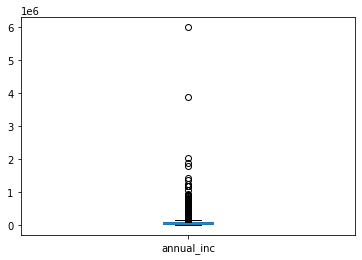

In [12]:
## Plot Box Plot for columns

box_plot(rg,"annual_inc")

## Identifying and Removing Outliers

In [13]:
#Outliers can only be performed for values in integer and float format
for i in rg.columns:
    print(i, rg[i].dtype)

loan_status object
loan_amnt int64
term int32
int_rate float64
grade object
sub_grade object
annual_inc float64
purpose object
dti float64
emp_length int32
last_pymnt_d object
home_ownership object
verification_status object


In [14]:
#Define function to identify Outlier

def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]
    
    return ls
    

In [15]:
#Find the index of the Outliers
rg1 =[]

#for i in [rg.annual_inc,rg.loan_amnt,rg.int_rate,rg.dti]:\
for i in ['loan_amnt','int_rate','annual_inc','dti','emp_length']:
    rg1.extend(outliers(rg, i))
print('Outlier rows to be removed -',len(rg1))
print('Total rows remainign -',len(rg)-len(rg1) )


Outlier rows to be removed - 2870
Total rows remainign - 34605


In [16]:
#remove the outliers

def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

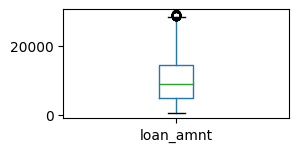

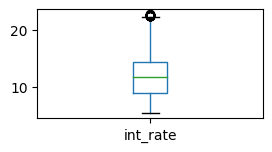

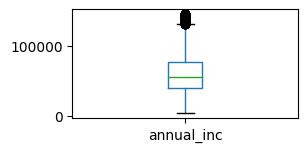

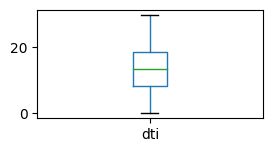

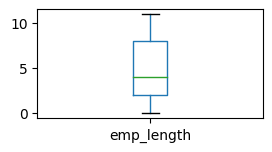

In [17]:
#take rg_1 as new data type which holds the index values of the rows of outliers
j=0
rg = remove(rg, rg1)
for i in ['loan_amnt','int_rate','annual_inc','dti','emp_length']:
    j += 1
    plt.subplot(3,2,j)
    box_plot(rg,i)
    plt.show()

# Percentage of Fully Paid over Total Applications

In [18]:
#Calculate the percentage of each column in terms of Full Paid/ Total. This gives you the clear view on which has lower risk of applications
import math

for i in rg.grade.value_counts().index.sort_values():
    x = len(rg[(rg.grade == i) & (rg.loan_status == 'Fully Paid')])/len(rg[(rg.grade == i)])*100
    print('Grade ', i, '-', math.floor(x*100)/100, '\b%')
    

Grade  A - 94.13 %
Grade  B - 88.07 %
Grade  C - 83.13 %
Grade  D - 78.3 %
Grade  E - 73.71 %
Grade  F - 68.46 %
Grade  G - 67.01 %


### Term

In [19]:
#Term
for i in rg.term.value_counts().index.sort_values():
    x = len(rg[(rg.term == i) & (rg.loan_status == 'Fully Paid')])/len(rg[(rg.term == i)])*100
    print('Term', i, 'months -', math.floor(x*100)/100, '\b%')


Term 36 months - 89.18 %
Term 60 months - 75.07 %


### Interest Rate

In [20]:
# Interest rate
rg.int_rate.value_counts().index.sort_values()

interest = [5,10,15,20]

for i in interest:
    x = len(rg[((rg.int_rate > i) & (rg.int_rate <= i+5)) & (rg.loan_status == 'Fully Paid')])/len(rg[((rg.int_rate > i) & (rg.int_rate <= i+5))])*100
    print('Interest Rate', i, '-',i+5,'% =', math.floor(x*100)/100, '\b%')

Interest Rate 5 - 10 % = 93.48 %
Interest Rate 10 - 15 % = 85.44 %
Interest Rate 15 - 20 % = 75.54 %
Interest Rate 20 - 25 % = 61.14 %


### Loan Amount 

In [21]:
#Loan Amount

loan = [0,5000,10000,15000,20000,25000]
rg.loan_amnt.value_counts().index.sort_values()
for i in loan:
    x = len(rg[((rg.loan_amnt > i) & (rg.loan_amnt <= i+5000)) & (rg.loan_status == 'Fully Paid')])/len(rg[((rg.loan_amnt > i) & (rg.loan_amnt <= i+5000))])*100
    print('Loan', i, '-',i+5000, '=', math.floor(x*100)/100, '\b%')

Loan 0 - 5000 = 86.78 %
Loan 5000 - 10000 = 87.4 %
Loan 10000 - 15000 = 86.38 %
Loan 15000 - 20000 = 82.38 %
Loan 20000 - 25000 = 80.44 %
Loan 25000 - 30000 = 78.83 %


### Annual Income 

In [22]:
#Annual Income

annual_inc = rg.loan_amnt[rg.loan_status == 'Fully Paid']
Ann = [0,20000,40000,60000,80000,100000]
rg.loan_amnt.value_counts().index.sort_values()

for i in Ann:
    x = len(rg[((rg.annual_inc > i) & (rg.annual_inc <= i+20000)) & (rg.loan_status == 'Fully Paid')])/len(rg[((rg.annual_inc > i) & (rg.annual_inc <= i+20000))])*100
    print('Annual Income',i, '-',i+20000, '=', math.floor(x*100)/100, '\b%')
x = len(rg[(rg.annual_inc > 100000) & (rg.loan_status == 'Fully Paid')])/len(rg[(rg.annual_inc > 100000)])*100
print('Annual Income 100000+ =', math.floor(x*100)/100, '\b%')

Annual Income 0 - 20000 = 81.8 %
Annual Income 20000 - 40000 = 82.73 %
Annual Income 40000 - 60000 = 85.04 %
Annual Income 60000 - 80000 = 87.35 %
Annual Income 80000 - 100000 = 89.28 %
Annual Income 100000 - 120000 = 90.58 %
Annual Income 100000+ = 90.25 %


### Purpose 

In [23]:
#Purpose

for i in rg.purpose.value_counts().index.sort_values():
    x = len(rg[(rg.purpose == i) & (rg.loan_status == 'Fully Paid')])/len(rg[(rg.purpose == i)])*100
    print(i,'\t', math.floor(x*100)/100, '\b%')


car 	 89.1%
credit_card 	 89.74%
debt_consolidation 	 85.22%
educational 	 83.88%
home_improvement 	 87.87%
house 	 84.24%
major_purchase 	 89.85%
medical 	 84.44%
moving 	 84.44%
other 	 84.38%
renewable_energy 	 82.14%
small_business 	 73.53%
vacation 	 85.5%
wedding 	 90.57%


### Home Ownership 

In [24]:
#Home Ownership

for i in rg.home_ownership.value_counts().index.sort_values():
    x = len(rg[(rg.home_ownership == i) & (rg.loan_status == 'Fully Paid')])/len(rg[(rg.home_ownership == i)])*100
    print(i,'\t', math.floor(x*100)/100, '\b%')    


MORTGAGE 	 86.67%
OTHER 	 81.72%
OWN 	 85.58%
RENT 	 85.33%


### Verification Status 

In [25]:
#Verifiation Status

for i in rg.verification_status.value_counts().index.sort_values():
    x = len(rg[(rg.verification_status == i) & (rg.loan_status == 'Fully Paid')])/len(rg[(rg.verification_status == i)])*100
    print(i,'\t', math.floor(x*100)/100, '\b%')

Not Verified 	 87.59%
Source Verified 	 85.48%
Verified 	 83.67%


### Last Payment Date (Month) 

In [26]:
for i in rg.last_pymnt_d.value_counts().index.sort_values():
    x = len(rg[(rg.last_pymnt_d == i) & (rg.loan_status == 'Fully Paid')])/len(rg[(rg.last_pymnt_d == i)])*100
    print(i,'\t', math.floor(x*100)/100, '\b%')

Apr 	 86.18%
Aug 	 85.94%
Dec 	 86.46%
Feb 	 87.25%
Jan 	 86.45%
Jul 	 84.15%
Jun 	 84.9%
Mar 	 88.76%
May 	 86.08%
Nov 	 85.68%
Oct 	 83.66%
Sep 	 84.74%


### DTI

In [27]:
#A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

rg.dti.value_counts().index.sort_values()
dti = [0,5,10,15,20,25]

for i in dti:
    x = len(rg[((rg.dti > i) & (rg.dti <= i+5)) & (rg.loan_status == 'Fully Paid')])/len(rg[((rg.dti > i) & (rg.dti <= i+5))])*100
    print('dti', i, '-', math.floor(x*100)/100, '\b%')

dti 0 - 87.89 %
dti 5 - 87.7 %
dti 10 - 85.88 %
dti 15 - 84.97 %
dti 20 - 83.71 %
dti 25 - 87.54 %


### Employment Length in Years

In [28]:
#Employment Length in years eg : 0 means less than 1 and 11 is beyond 10 any number of years

for i in rg.emp_length.value_counts().index.sort_values():
    x = len(rg[(rg.emp_length == i) & (rg.loan_status == 'Fully Paid')])/len(rg[(rg.emp_length == i)])*100
    print(i,'\t', math.floor(x*100)/100, '\b%')

0 	 86.18 %
1 	 85.74 %
2 	 86.93 %
3 	 86.63 %
4 	 86.6 %
5 	 86.12 %
6 	 85.96 %
7 	 85.16 %
8 	 86.0 %
9 	 87.23 %
11 	 84.48 %


## Scatter Plot between Annual Income and Interest rate 

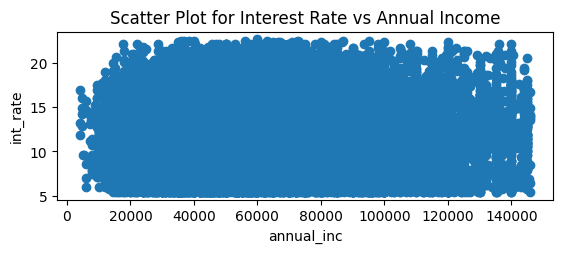

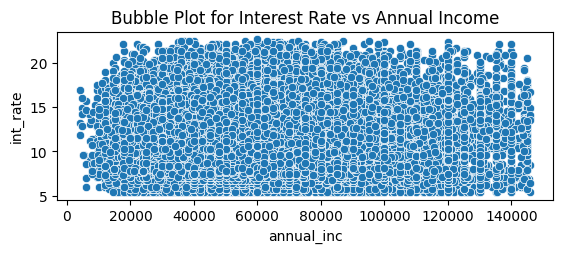

In [29]:
#Sample scatter plot for Annual income and Interest Rate

plt.subplot(2,1,1)
plt.scatter(rg.annual_inc, rg.int_rate)
plt.xlabel('annual_inc')
plt.ylabel('int_rate')
plt.title('Scatter Plot for Interest Rate vs Annual Income')
plt.show()

plt.subplot(2,1,2)
sns.scatterplot(data=rg, x='annual_inc', y='int_rate', legend=False)
plt.title('Bubble Plot for Interest Rate vs Annual Income')
plt.show()


## Bubble Plot for Annual Income vs Loan Amount

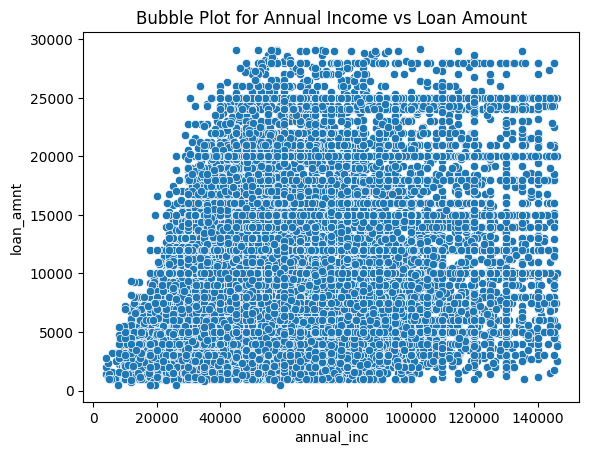

In [30]:
sns.scatterplot(data=rg, x='annual_inc', y='loan_amnt', legend=False)
plt.title('Bubble Plot for Annual Income vs Loan Amount')
plt.show()

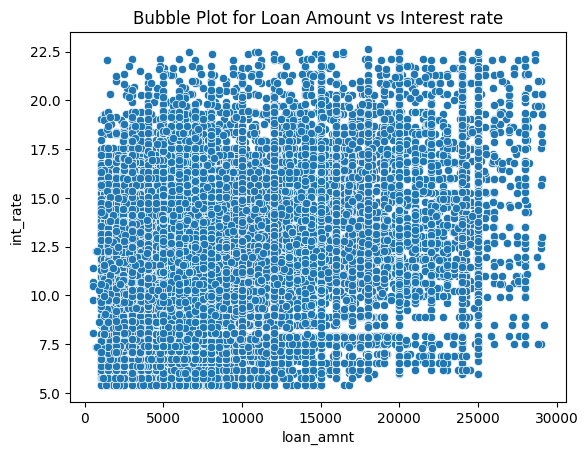

In [31]:
sns.scatterplot(data=rg, x='loan_amnt', y='int_rate', legend=False)
plt.title('Bubble Plot for Loan Amount vs Interest rate')
plt.show()

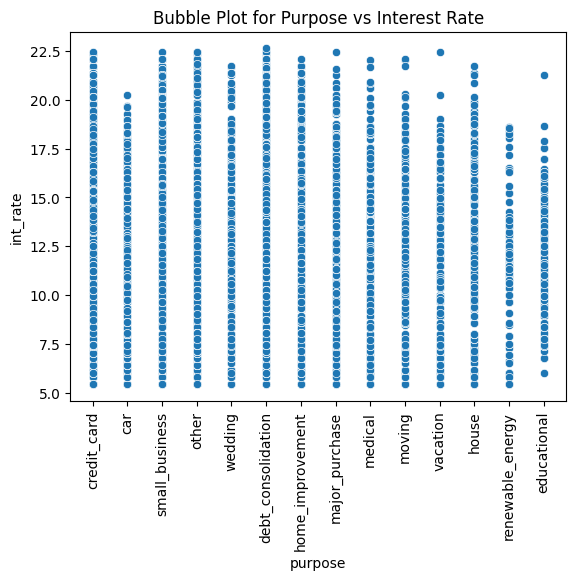

In [32]:
sns.scatterplot(data=rg, x='purpose', y='int_rate', legend=False)
plt.title('Bubble Plot for Purpose vs Interest Rate')
plt.xticks(rotation=90)
plt.show()

# Histograms for Charged Off vs Fully Paid


### Loan Status 

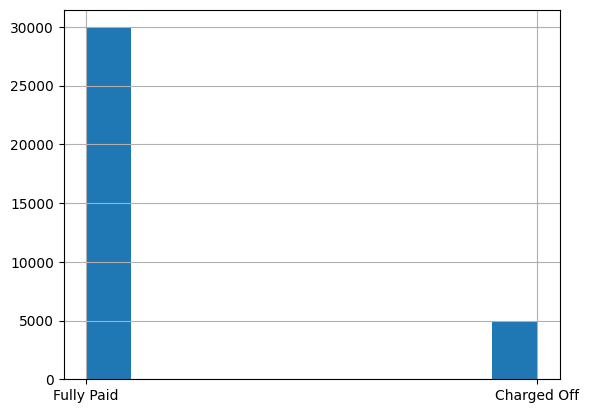

In [33]:
#Loan Status
rg['loan_status'].hist()
plt.show()

### Loan Amount 

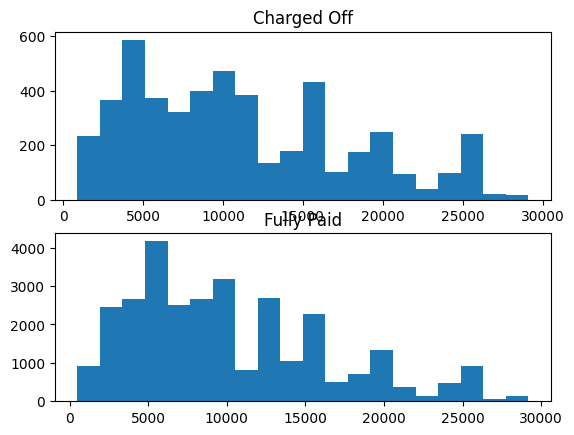

In [34]:
#Loan Amount

plt.subplot(2,1,1)

plt.hist(rg['loan_amnt'][(rg.loan_status == 'Charged Off')], bins = 20)
plt.title('Charged Off')

plt.subplot(2,1,2)
plt.hist(rg['loan_amnt'][(rg.loan_status == 'Fully Paid')], bins = 20)
plt.title('Fully Paid')

plt.show()


### Term 

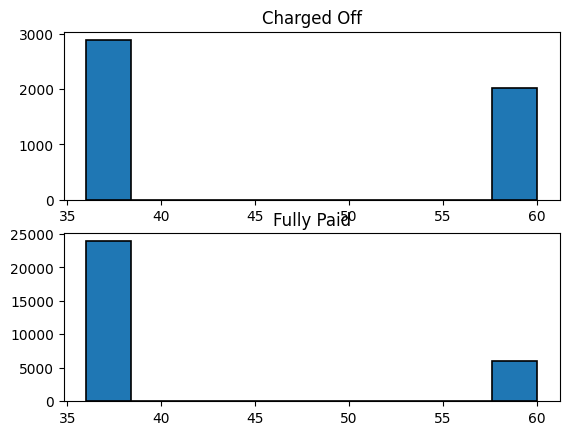

In [35]:
# Term

plt.subplot(2,1,1)

plt.hist(rg['term'][(rg.loan_status == 'Charged Off')], edgecolor='black', linewidth=1.2)
plt.title('Charged Off')

plt.subplot(2,1,2)
plt.hist(rg['term'][(rg.loan_status == 'Fully Paid')], edgecolor='black', linewidth=1.2)
plt.title('Fully Paid')

plt.show()

### Interest Rate 

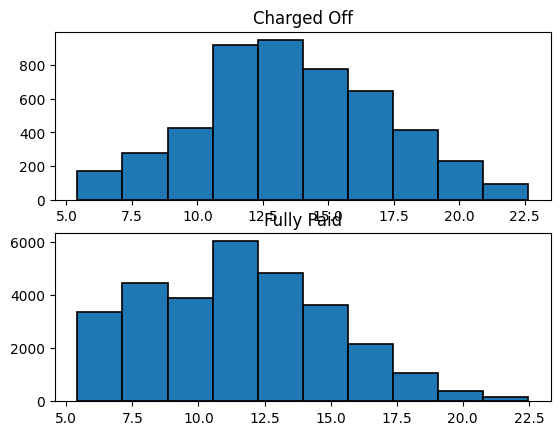

In [36]:
#Interest Rate
plt.subplot(2,1,1)

plt.hist(rg['int_rate'][(rg.loan_status == 'Charged Off')], edgecolor='black', linewidth=1.2)
plt.title('Charged Off')

plt.subplot(2,1,2)
plt.hist(rg['int_rate'][(rg.loan_status == 'Fully Paid')], edgecolor='black', linewidth=1.2)
plt.title('Fully Paid')

plt.show()


### Grade

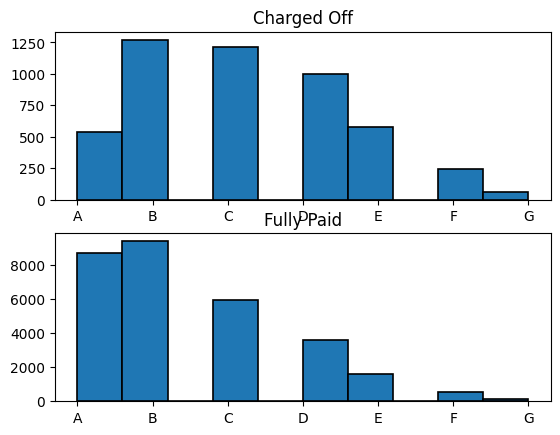

In [37]:
#Grade
plt.subplot(2,1,1)

plt.hist(rg['grade'][(rg.loan_status == 'Charged Off')].sort_values(), edgecolor='black', linewidth=1.2)
plt.title('Charged Off')

plt.subplot(2,1,2)
plt.hist(rg['grade'][(rg.loan_status == 'Fully Paid')].sort_values(), edgecolor='black', linewidth=1.2)
plt.title('Fully Paid')

plt.show()

### Sub Grade 

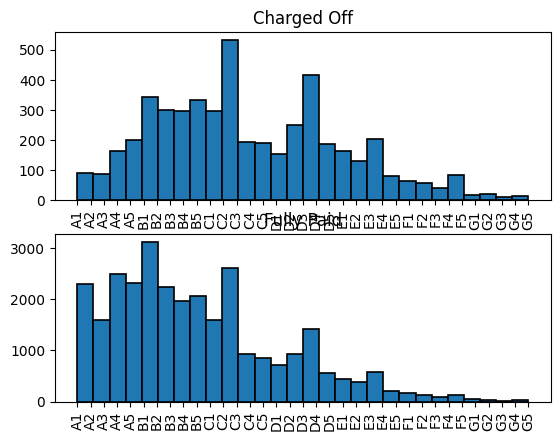

In [38]:
#Plot a histogram for Size as well.
rg['sub_grade'].hist()
plt.subplot(2,1,1)

plt.hist(rg.sub_grade.sort_values()[(rg.loan_status == 'Charged Off')],edgecolor='black', linewidth=1.2, bins = 28)
plt.title('Charged Off')
plt.xticks(rotation=90)

plt.subplot(2,1,2)
plt.hist(rg.sub_grade.sort_values()[(rg.loan_status == 'Fully Paid')], edgecolor='black', linewidth=1.2, bins = 28)
plt.title('Fully Paid')
plt.xticks(rotation=90)

plt.show()

### Purpose 

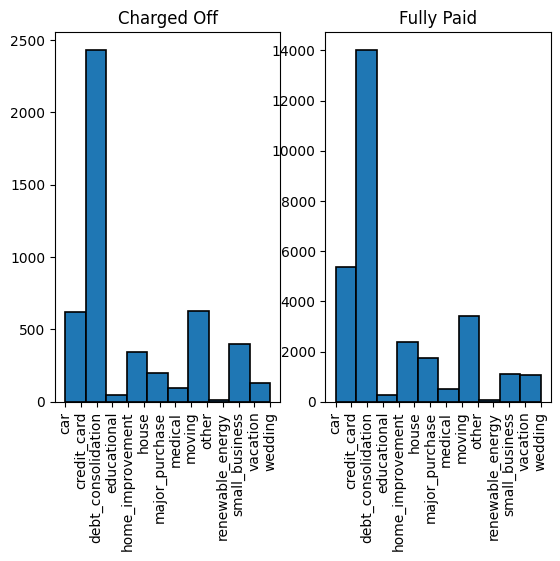

In [39]:
plt.subplot(1,2,1)

plt.hist(rg['purpose'][(rg.loan_status == 'Charged Off')].sort_values(), edgecolor='black', linewidth=1.2)
plt.title('Charged Off')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.hist(rg['purpose'][(rg.loan_status == 'Fully Paid')].sort_values(), edgecolor='black', linewidth=1.2)
plt.title('Fully Paid')
plt.xticks(rotation=90)

plt.show()

### DTI 

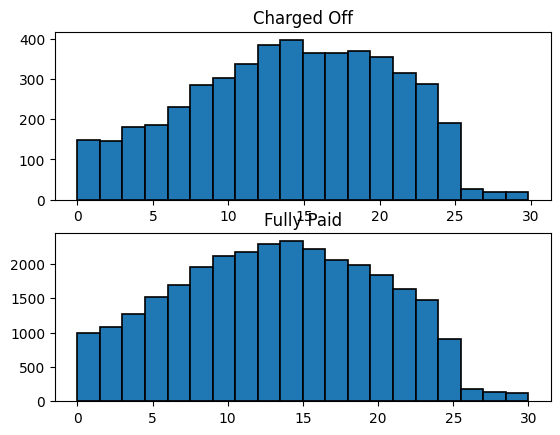

In [40]:
plt.subplot(2,1,1)

plt.hist(rg['dti'][(rg.loan_status == 'Charged Off')], edgecolor='black', linewidth=1.2, bins = 20)
plt.title('Charged Off')

plt.subplot(2,1,2)
plt.hist(rg['dti'][(rg.loan_status == 'Fully Paid')], edgecolor='black', linewidth=1.2, bins = 20)
plt.title('Fully Paid')

plt.show()

### Employment Years length 

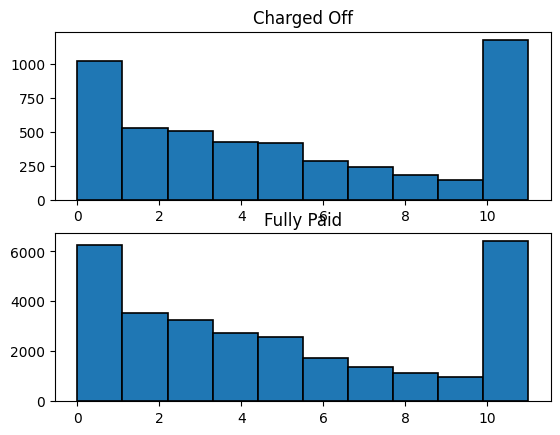

In [41]:
plt.subplot(2,1,1)

plt.hist(rg['emp_length'][(rg.loan_status == 'Charged Off')], edgecolor='black', linewidth=1.2)
plt.title('Charged Off')

plt.subplot(2,1,2)
plt.hist(rg['emp_length'][(rg.loan_status == 'Fully Paid')], edgecolor='black', linewidth=1.2)
plt.title('Fully Paid')

plt.show()

### Last Payment Date (Month) 

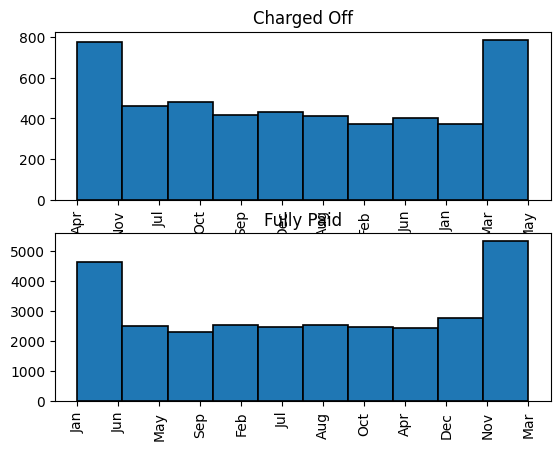

In [42]:
plt.subplot(2,1,1)

plt.hist(rg['last_pymnt_d'][(rg.loan_status == 'Charged Off')], edgecolor='black', linewidth=1.2)
plt.title('Charged Off')
plt.xticks(rotation=90)

plt.subplot(2,1,2)
plt.hist(rg['last_pymnt_d'][(rg.loan_status == 'Fully Paid')], edgecolor='black', linewidth=1.2)
plt.title('Fully Paid')
plt.xticks(rotation=90)

plt.show()

### Home Ownership 

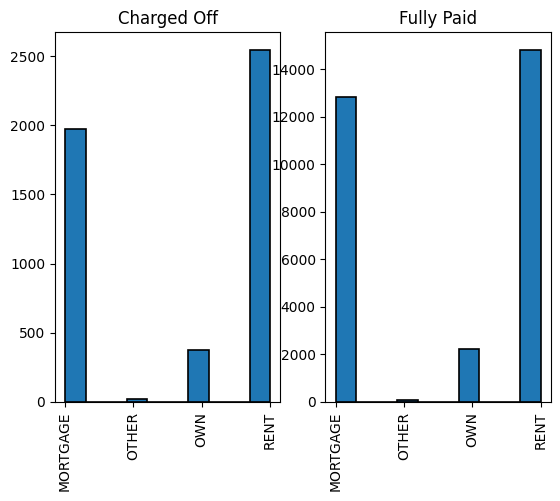

In [43]:
plt.subplot(1,2,1)

plt.hist(rg['home_ownership'][(rg.loan_status == 'Charged Off')].sort_values(), edgecolor='black', linewidth=1.2)
plt.title('Charged Off')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.hist(rg['home_ownership'][(rg.loan_status == 'Fully Paid')].sort_values(), edgecolor='black', linewidth=1.2)
plt.title('Fully Paid')
plt.xticks(rotation=90)

plt.show()

### Verification Status 

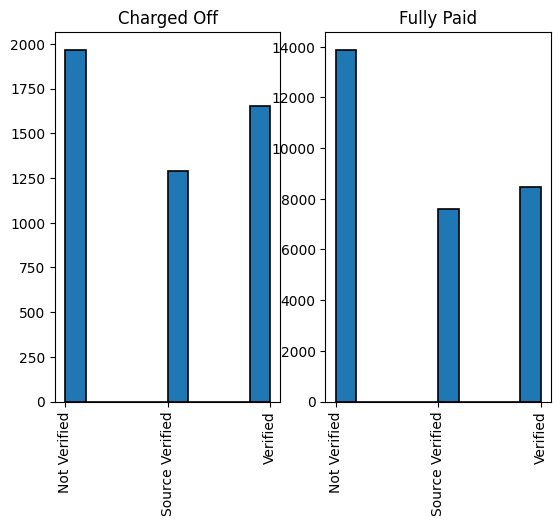

In [44]:
plt.subplot(1,2,1)

plt.hist(rg['verification_status'][(rg.loan_status == 'Charged Off')].sort_values(), edgecolor='black', linewidth=1.2)
plt.title('Charged Off')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.hist(rg['verification_status'][(rg.loan_status == 'Fully Paid')].sort_values(), edgecolor='black', linewidth=1.2)
plt.title('Fully Paid')
plt.xticks(rotation=90)

plt.show()

# Distribution Plots (Fully Paid & Charged Off)

### Home Ownership 

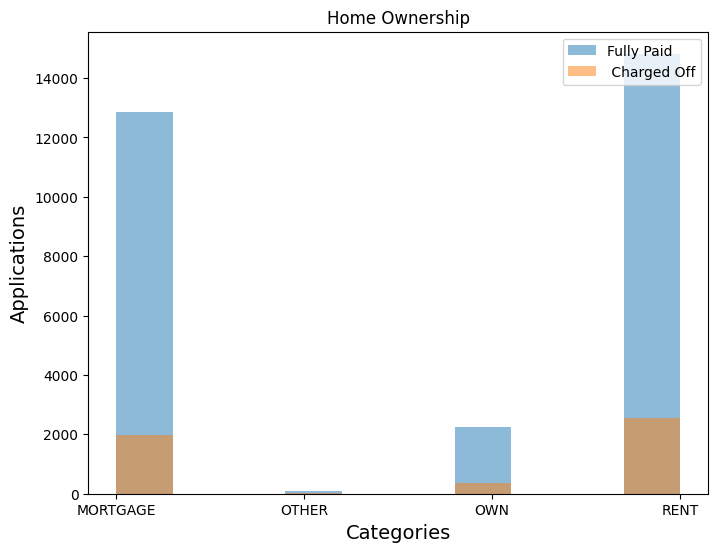

In [45]:
plt.figure(figsize=(8,6))

plt.hist(rg['home_ownership'][(rg.loan_status == 'Fully Paid')].sort_values(), alpha=0.5, label="Fully Paid")
plt.hist(rg['home_ownership'][(rg.loan_status == 'Charged Off')].sort_values(), alpha=0.5, label=" Charged Off")

plt.xlabel("Categories", size=14)
plt.ylabel("Applications", size=14)
plt.title("Home Ownership")
plt.legend(loc='upper right')

plt.show()

###  Loan Amount

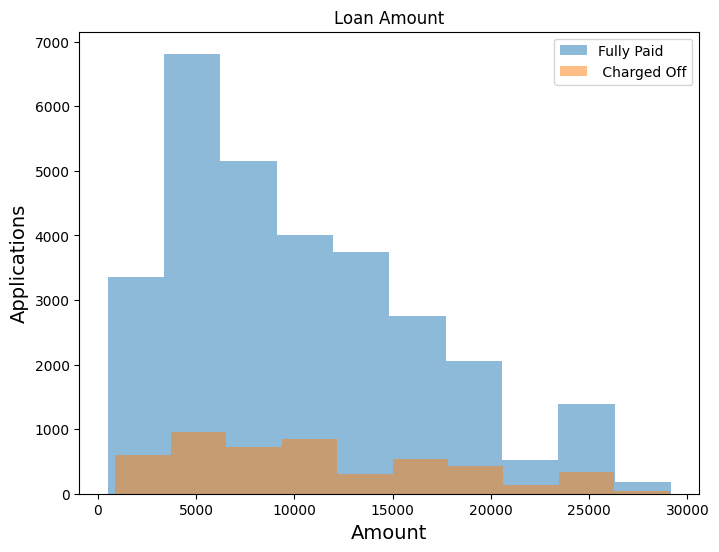

In [46]:

plt.figure(figsize=(8,6))

plt.hist(rg['loan_amnt'][(rg.loan_status == 'Fully Paid')].sort_values(), alpha=0.5, label="Fully Paid")
plt.hist(rg['loan_amnt'][(rg.loan_status == 'Charged Off')].sort_values(), alpha=0.5, label=" Charged Off")

plt.xlabel("Amount", size=14)
plt.ylabel("Applications", size=14)
plt.title("Loan Amount")
plt.legend(loc='upper right')

plt.show()

### Term 

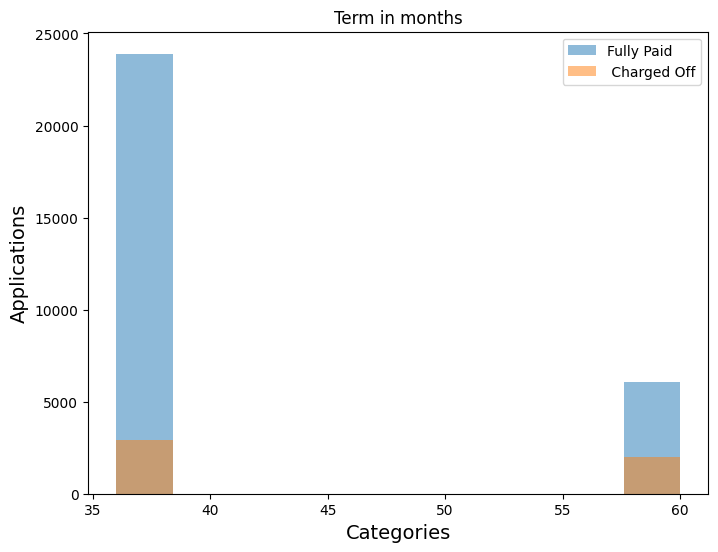

In [47]:

plt.figure(figsize=(8,6))

plt.hist(rg['term'][(rg.loan_status == 'Fully Paid')].sort_values(), alpha=0.5, label="Fully Paid")
plt.hist(rg['term'][(rg.loan_status == 'Charged Off')].sort_values(), alpha=0.5, label=" Charged Off")

plt.xlabel("Categories", size=14)
plt.ylabel("Applications", size=14)
plt.title("Term in months")
plt.legend(loc='upper right')

plt.show()

### Grade 

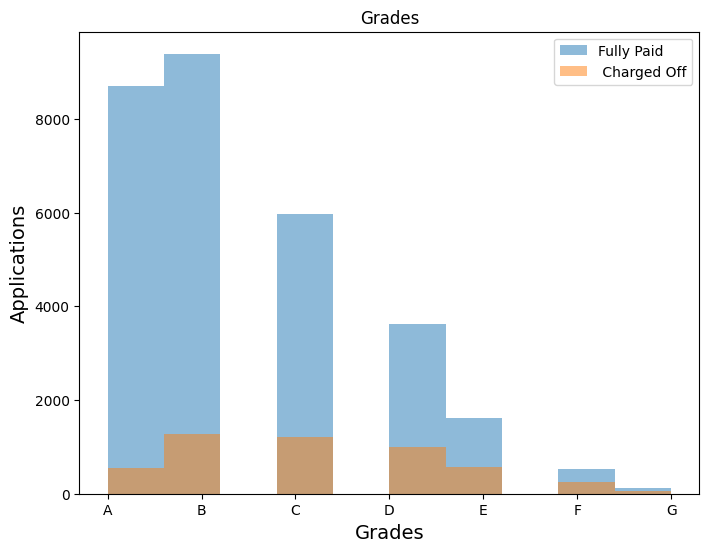

In [48]:

plt.figure(figsize=(8,6))

plt.hist(rg['grade'][(rg.loan_status == 'Fully Paid')].sort_values(), alpha=0.5, label="Fully Paid")
plt.hist(rg['grade'][(rg.loan_status == 'Charged Off')].sort_values(), alpha=0.5, label=" Charged Off")

plt.xlabel("Grades", size=14)
plt.ylabel("Applications", size=14)
plt.title("Grades")
plt.legend(loc='upper right')

plt.show()

### Sub Grades 

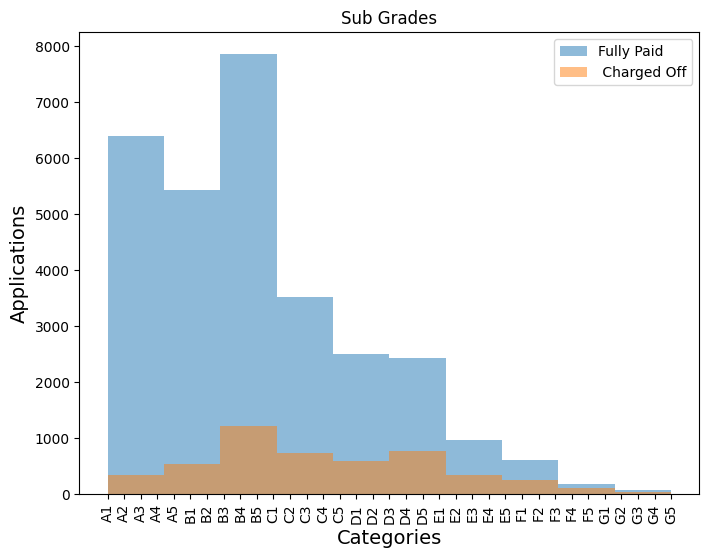

In [49]:

plt.figure(figsize=(8,6))

plt.hist(rg['sub_grade'][(rg.loan_status == 'Fully Paid')].sort_values(), alpha=0.5, label="Fully Paid")
plt.hist(rg['sub_grade'][(rg.loan_status == 'Charged Off')].sort_values(), alpha=0.5, label=" Charged Off")

plt.xlabel("Categories", size=14)
plt.ylabel("Applications", size=14)
plt.title("Sub Grades")
plt.legend(loc='upper right')
plt.xticks(rotation=90)

plt.show()

### Annual Income 

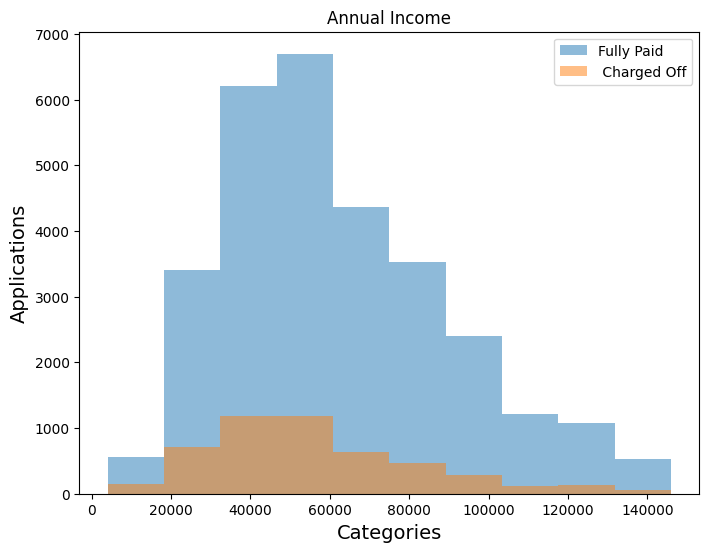

In [50]:
plt.figure(figsize=(8,6))

plt.hist(rg['annual_inc'][(rg.loan_status == 'Fully Paid')], alpha=0.5, label="Fully Paid")
plt.hist(rg['annual_inc'][(rg.loan_status == 'Charged Off')], alpha=0.5, label=" Charged Off")

plt.xlabel("Categories", size=14)
plt.ylabel("Applications", size=14)
plt.title("Annual Income")
plt.legend(loc='upper right')

plt.show()

### Purpose 

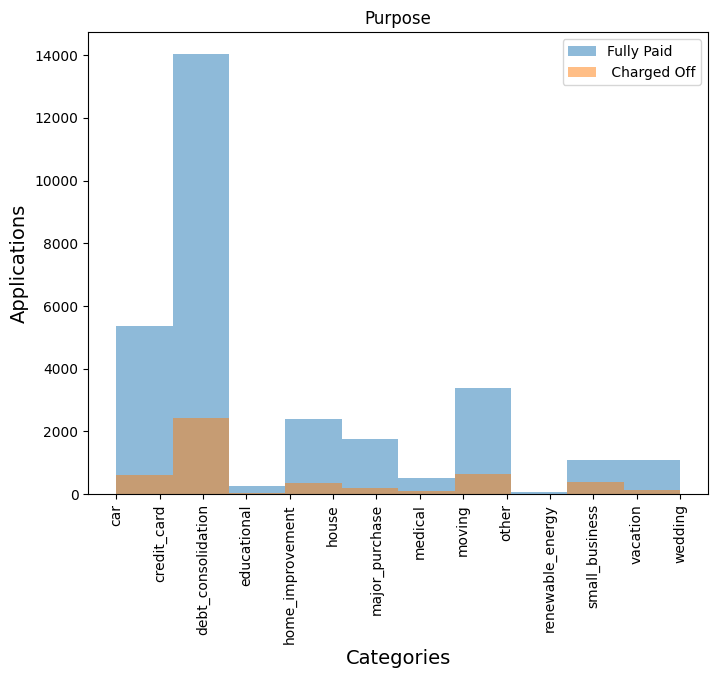

In [51]:

plt.figure(figsize=(8,6))

plt.hist(rg['purpose'][(rg.loan_status == 'Fully Paid')].sort_values(), alpha=0.5, label="Fully Paid")
plt.hist(rg['purpose'][(rg.loan_status == 'Charged Off')].sort_values(), alpha=0.5, label=" Charged Off")

plt.xlabel("Categories", size=14)
plt.ylabel("Applications", size=14)
plt.title("Purpose")
plt.legend(loc='upper right')

plt.xticks(rotation=90)

plt.show()

### dti 

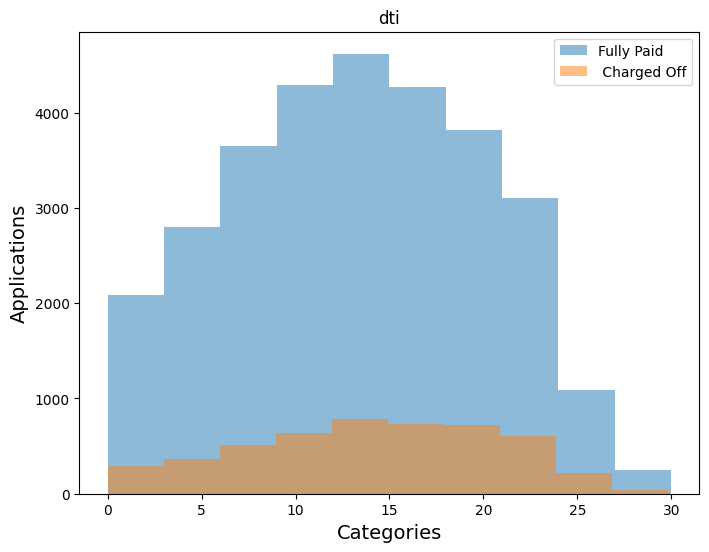

In [52]:

plt.figure(figsize=(8,6))

plt.hist(rg['dti'][(rg.loan_status == 'Fully Paid')].sort_values(), alpha=0.5, label="Fully Paid")
plt.hist(rg['dti'][(rg.loan_status == 'Charged Off')].sort_values(), alpha=0.5, label=" Charged Off")

plt.xlabel("Categories", size=14)
plt.ylabel("Applications", size=14)
plt.title("dti")
plt.legend(loc='upper right')

plt.show()

### Employment Length in Years 

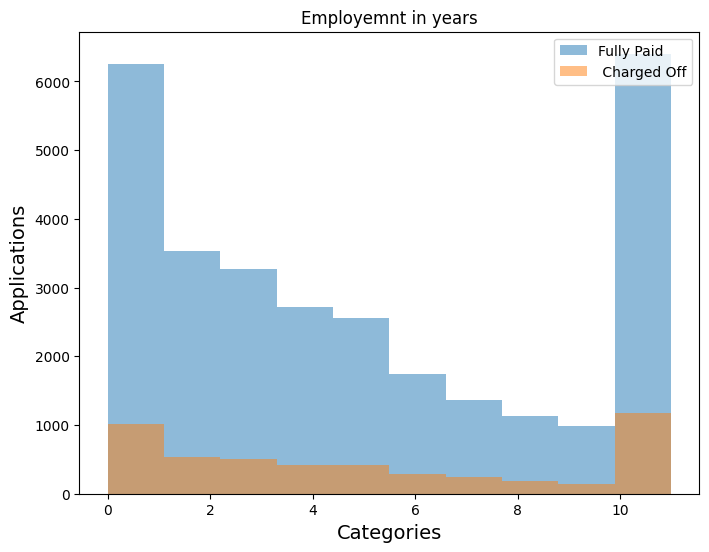

In [53]:

plt.figure(figsize=(8,6))

plt.hist(rg['emp_length'][(rg.loan_status == 'Fully Paid')].sort_values(), alpha=0.5, label="Fully Paid")
plt.hist(rg['emp_length'][(rg.loan_status == 'Charged Off')].sort_values(), alpha=0.5, label=" Charged Off")

plt.xlabel("Categories", size=14)
plt.ylabel("Applications", size=14)
plt.title("Employemnt in years")
plt.legend(loc='upper right')

plt.show()

### Home Ownership 

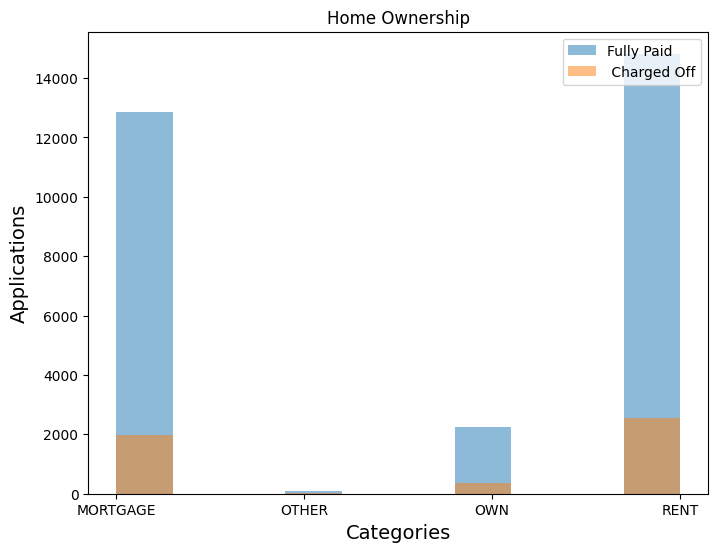

In [54]:

plt.figure(figsize=(8,6))

plt.hist(rg['home_ownership'][(rg.loan_status == 'Fully Paid')].sort_values(), alpha=0.5, label="Fully Paid")
plt.hist(rg['home_ownership'][(rg.loan_status == 'Charged Off')].sort_values(), alpha=0.5, label=" Charged Off")

plt.xlabel("Categories", size=14)
plt.ylabel("Applications", size=14)
plt.title("Home Ownership")
plt.legend(loc='upper right')

plt.show()

### Verification Status 

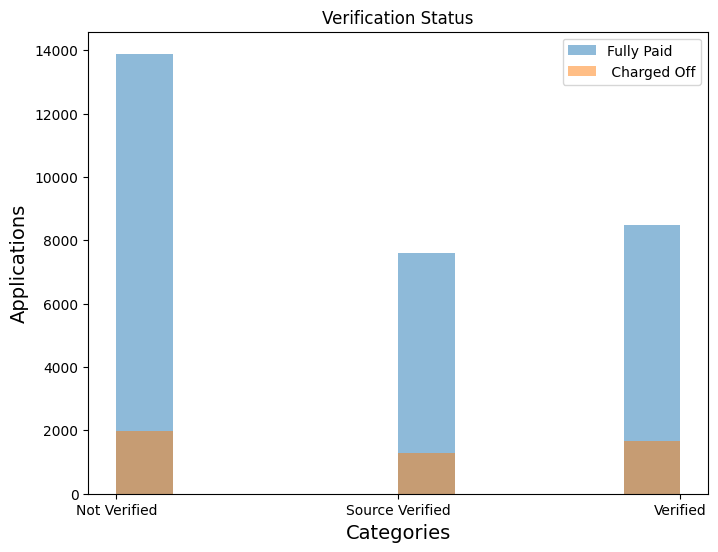

In [55]:
plt.figure(figsize=(8,6))

plt.hist(rg['verification_status'][(rg.loan_status == 'Fully Paid')].sort_values(), alpha=0.5, label="Fully Paid")
plt.hist(rg['verification_status'][(rg.loan_status == 'Charged Off')].sort_values(), alpha=0.5, label=" Charged Off")

plt.xlabel("Categories", size=14)
plt.ylabel("Applications", size=14)
plt.title("Verification Status")
plt.legend(loc='upper right')

plt.show()

# Pie-Chart for Fully Paid vs Charged Off

### Term 

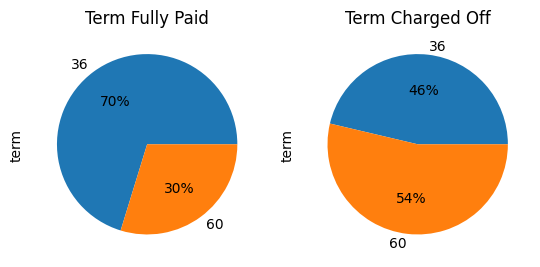

In [56]:
plt.subplot(1,2,1)

rg.term[(rg.loan_status == 'Fully Paid')].groupby(rg.term).sum().plot(kind='pie',autopct='%1.0f%%', title='Fully paid')
plt.title('Term Fully Paid')

plt.subplot(1,2,2)

rg.term[(rg.loan_status == 'Charged Off')].groupby(rg.term).sum().plot(kind='pie',autopct='%1.0f%%', title='Fully paid')
plt.title('Term Charged Off')
plt.show()


### Grade 

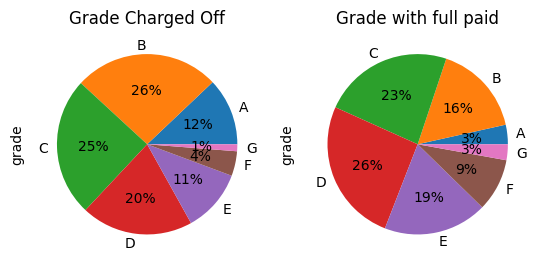

In [57]:
#Plot a pie chart

#Converting A-G to 1-7 for Analysis
temp_grade = rg['grade']
temp_grade = temp_grade.str.replace("A","1")
temp_grade = temp_grade.str.replace("B","2")
temp_grade = temp_grade.str.replace("C","3")
temp_grade = temp_grade.str.replace("D","4")
temp_grade = temp_grade.str.replace("E","5")
temp_grade = temp_grade.str.replace("F","6")
temp_grade = temp_grade.str.replace("G","7")
temp_grade = temp_grade.astype(int)

plt.subplot(1,2,1)

temp_grade[(rg.loan_status == 'Fully Paid')].sort_values().groupby(temp_grade).sum().plot(kind='pie',autopct='%1.0f%%', title='Fully paid', labels = ['A','B','C','D','E','F','G'])
plt.title('Grade Charged Off')


plt.subplot(1,2,2)
temp_grade[(rg.loan_status == 'Charged Off')].sort_values().groupby(temp_grade).sum().plot(kind='pie',autopct='%1.0f%%', title='Fully paid', labels = ['A','B','C','D','E','F','G'])
plt.title('Grade with full paid')

plt.show()